In [1]:
# imports, note scipy>=1.8 is needed
import numpy as np
import random
import networkx as nx
import re
from IPython.display import Image
import matplotlib.pyplot as plt
import collections
from matplotlib.ticker import MaxNLocator
import community
import statistics as stats
from collections import Counter
import seaborn as sns
from matplotlib import rc
import pandas as pd
import csv
import sklearn.cluster
import scipy
import plotly
import plotly.graph_objs as go
print("done")

done


In [2]:

file = open("list_of_characters.txt", "r", encoding="utf8")
content = file.read()
file.close()

list_of_characters = re.split(' \n | \n|\n |\n', content)
for i in range(len(list_of_characters)):
    list_of_characters[i] = list_of_characters[i].split(' / ')

file = open("war_and_peace.txt", encoding="utf8")
# print(file.read())
content = file.read()
file.close()

chapter_list = content.split("\n")

# print(chapter_list[40])

# print(len(chapter_list))

# found a name at least founded once in the text not the same as one in the list

print(len(list_of_characters))

counter=0
for character in list_of_characters:
    appears = False
    for name in character:
        # print(character)
        for i in range(len(chapter_list)):
            if chapter_list[i].find(name) != -1:
                appears = True
    if not appears:
        list_of_characters.remove(character)
        # print(character)





50


6


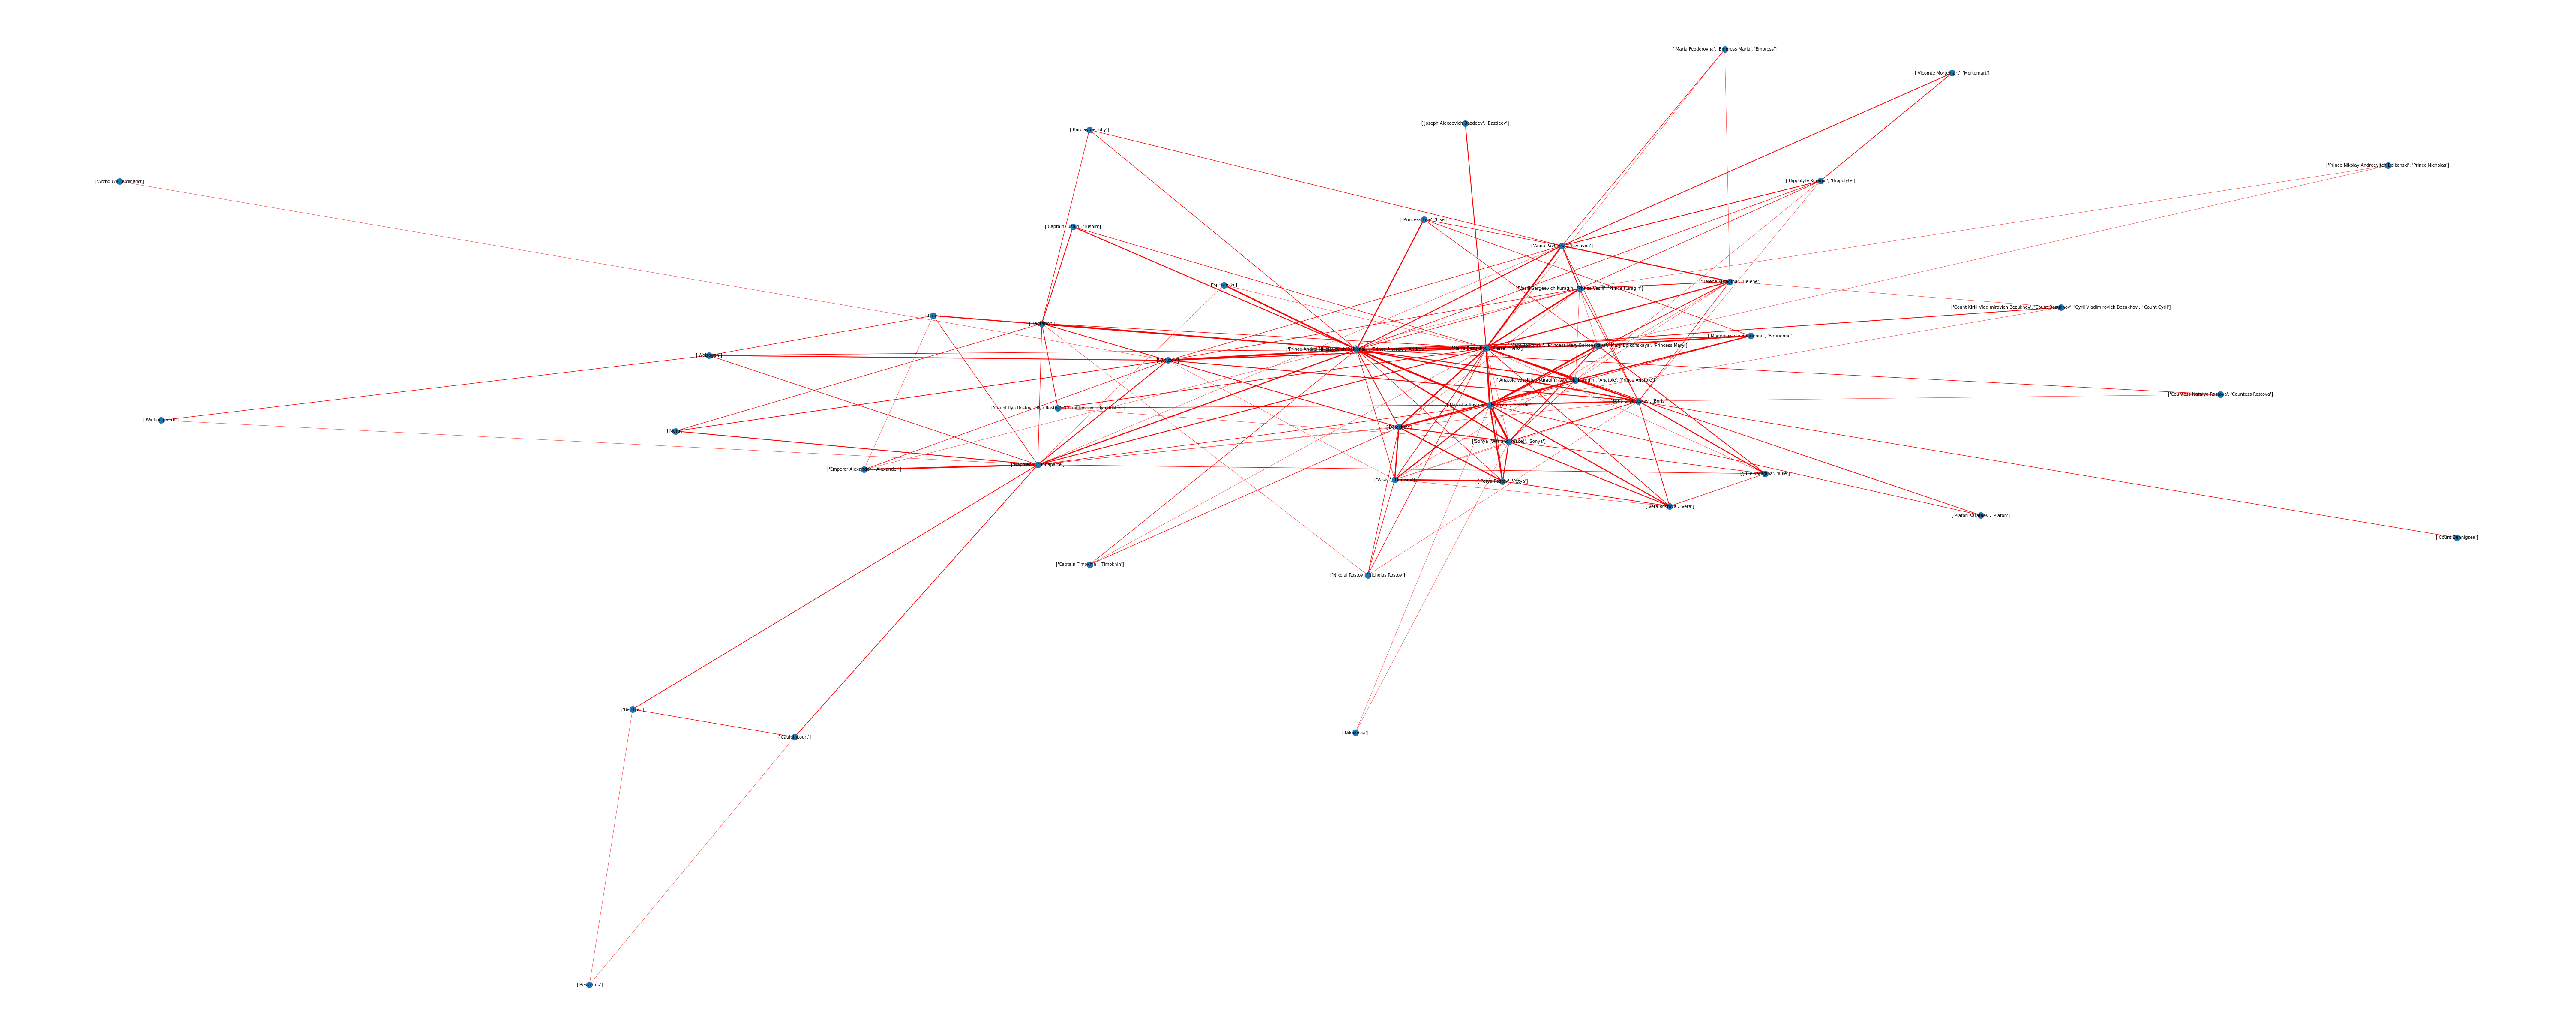

In [3]:
# make graph


from platform import node


G = nx.Graph()

for character in list_of_characters: #here we are adding one node per each character in the list
    G.add_node(str(character))
#First, we do a for loop for finding the characters in the book
for chapter in chapter_list: #for each chapter in the book 
    characters_appear = [] #creation of empty array that'll contain each character that appears
    for character in list_of_characters: #for each character in the list
        for name in character: #for name x of the character given
            if chapter.find(name) != -1: #if we find the name's character in the chapter
                characters_appear.append(character) #we add it to our array
    for character1 in characters_appear: #for each character 1 contained in our list
        for character2 in characters_appear:#for each character 2 contained in our list
            if (character1!=character2): #if ch1 is not equal to ch2
                n0 = str(character1) #node 0
                n1 = str(character2) #node 1
                if G.has_edge(n0,n1):   
                    G[n0][n1]['weight'] += 1
                else: #if there's no edge between n0 and n1, we add an edge
                    G.add_edge(n0,n1, weight=1) #our default weight is 1

# print(G.degree()) #the node degree is the nº of edges adjacent to the node
#the weighted node degree is the sum of the edge weights for edges incident to that node



nb = nx.number_connected_components(G)
print(nb) #it returns us the nº of connected components


S = G.subgraph(max(nx.connected_components(G), key=len))


edges = G.edges()
weights = np.log([S[u][v]['weight'] for u,v in edges])

fig = plt.figure(1, figsize=(100, 40), dpi=60)
# nx.draw_networkx(S, with_labels=True, width=weights, edge_color='r')
nx.draw(S, with_labels=True, width=weights,  edge_color='r') 
# nx.draw_random(S, with_labels=True, width=weights, edge_color='r')
# nx.draw_circular(S, with_labels=True, width=weights, edge_color='r') 
# nx.draw_spectral(S, with_labels=True, width=weights)  
# nx.draw_spring(S, with_labels=True, width=weights, edge_color='r') 



In [4]:

# print(S.number_of_nodes())
# print(sorted(S.degree, key=lambda x: x[1], reverse=True))
# print(nx.degree_assortativity_coefficient(S))

# print(nx.adjacency_matrix(S))
adj = nx.adjacency_matrix(S).toarray().astype(np.float64)
max = np.max(adj@np.ones(adj.shape[0]))
adj/=max
# print(adj)


def decision(probability):
    return random.random() < probability


def ICM(p_matrix:np.matrix, nbsteps:int, set_infected_nodes:set, gamma:int)->int:

    set_already_infected_nodes = set_infected_nodes.copy()

    for i in range(nbsteps):

        for node in set_infected_nodes.copy():
            for index in range(p_matrix.shape[0]):
                p = p_matrix[node][index]
                if decision(p):
                    if (index not in set_already_infected_nodes):
                        set_infected_nodes.add(index) 
                    set_already_infected_nodes.add(index)

            if decision(gamma):
                set_infected_nodes.remove(node)

        # print(set_infected_nodes)

        if (len(set_infected_nodes)==0):
            break
        
    return len(set_already_infected_nodes)



ICM(adj, 100000, set([0, 1, 2, 3, 4]), 0.02)

gamma = 0.02
nbsteps = 10000

# 5% of 45 ~= 2
# random.sample(range(1, 100), 3)


# Our graph has some nodes with a high def-gree